In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [4]:
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=42,
    hypercube=False,
    class_sep=10,
)

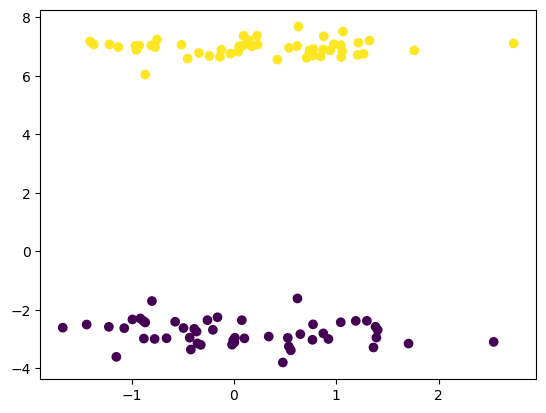

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [9]:
def step(z):
    return 1 if z > 0 else 0

In [8]:
def perceptron(X, y):
    # add bias
    X = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weights))
        weights = weights + lr * (y[j] - y_hat) * X[j]
    
    return weights[0], weights[1:]

In [10]:
intercept , coeff = perceptron(X, y)

In [11]:
print(intercept, coeff)

0.9 [0.74608373 1.30991644]


In [12]:
# Ax +By + C = 0
# m = -A/B = -coeff[0]/coeff[1]
# C = -C/B = -intercept/coeff[1]

m = -coeff[0]/coeff[1]
c = -intercept/coeff[1]

In [13]:
X_input = np.linspace(-3, 3, 100)
Y_input = m * X_input + c


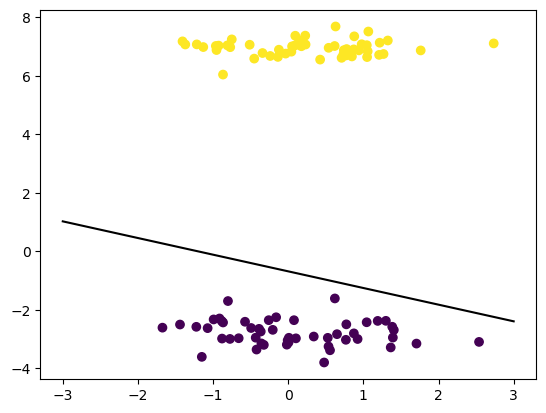

In [14]:
plt.plot(X_input, Y_input, 'black')
plt.scatter(X[:, 0], X[:, 1], c=y)
